In [ ]:
from data import BaostockDataWorker, DATABASE
DATABASE_PATH = os.getcwd()     # 解决方法
print("----database:"+DATABASE_PATH +"/"+ DATABASE + "----")
dw = BaostockDataWorker()


In [5]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取行业分类数据
rs = bs.query_stock_industry()
# rs = bs.query_stock_basic(code_name="浦发银行")
print('query_stock_industry error_code:'+rs.error_code)
print('query_stock_industry respond  error_msg:'+rs.error_msg)

# 打印结果集
industry_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    industry_list.append(rs.get_row_data())
result = pd.DataFrame(industry_list, columns=rs.fields)
# 结果集输出到csv文件
# result.to_csv("D:/stock_industry.csv", encoding="gbk", index=False)
print(result)

# 登出系统
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_stock_industry error_code:0
query_stock_industry respond  error_msg:success
      updateDate       code code_name industry industryClassification
0     2022-08-01  sh.600000      浦发银行       银行                 申万一级行业
1     2022-08-01  sh.600001      邯郸钢铁                          申万一级行业
2     2022-08-01  sh.600002      齐鲁石化                          申万一级行业
3     2022-08-01  sh.600003     ST东北高                          申万一级行业
4     2022-08-01  sh.600004      白云机场     交通运输                 申万一级行业
...          ...        ...       ...      ...                    ...
4925  2022-08-01  sz.301289      国缆检测                          申万一级行业
4926  2022-08-01  sz.301298      东利机械                          申万一级行业
4927  2022-08-01  sz.301302      华如科技                          申万一级行业
4928  2022-08-01  sz.301306      西测测试                          申万一级行业
4929  2022-08-01  sz.301312       智立方                          申万一级行业

[4

In [6]:
result

,updateDate,code,code_name,industry,industryClassification
0,2022-08-01,sh.600000,浦发银行,银行,申万一级行业
1,2022-08-01,sh.600001,邯郸钢铁,,申万一级行业
2,2022-08-01,sh.600002,齐鲁石化,,申万一级行业
3,2022-08-01,sh.600003,ST东北高,,申万一级行业
4,2022-08-01,sh.600004,白云机场,交通运输,申万一级行业
...,...,...,...,...,...
4925,2022-08-01,sz.301289,国缆检测,,申万一级行业
4926,2022-08-01,sz.301298,东利机械,,申万一级行业
4927,2022-08-01,sz.301302,华如科技,,申万一级行业
4928,2022-08-01,sz.301306,西测测试,,申万一级行业


In [7]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.000032",
    "date,code,open,high,low,close,volume,amount,adjustflag",
    start_date='2017-07-01', end_date='2017-12-31',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

df = rs.get_data()

#### 登出系统 ####
bs.logout()
df

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
logout success!


,date,code,open,high,low,close,volume,amount,adjustflag
0,2017-07-03,sh.000032,1587.0440,1605.1050,1585.0800,1604.3450,618638704,4389029888.0000,3
1,2017-07-04,sh.000032,1601.9850,1610.6520,1599.1580,1604.5470,669748208,4653228800.0000,3
2,2017-07-05,sh.000032,1609.6960,1620.7880,1605.8210,1617.9030,686401008,5055446272.0000,3
3,2017-07-06,sh.000032,1623.1880,1637.2260,1617.4250,1630.5480,972281600,7437236224.0000,3
4,2017-07-07,sh.000032,1624.8530,1647.2900,1619.7300,1644.4660,897491696,6954533376.0000,3
...,...,...,...,...,...,...,...,...,...
120,2017-12-25,sh.000032,1653.7830,1653.7830,1638.0490,1638.8060,864797104,7012241664.0000,3
121,2017-12-26,sh.000032,1637.2440,1648.0420,1626.9080,1646.3150,718444208,5761362176.0000,3
122,2017-12-27,sh.000032,1646.1440,1678.6640,1645.8980,1656.5420,1208642000,10089702912.0000,3
123,2017-12-28,sh.000032,1650.8540,1678.0320,1644.5060,1671.7170,1122464896,9516788992.0000,3


In [8]:
df[['open',	'high',	'low',	'close','volume','amount']] = df[['open',	'high',	'low',	'close','volume','amount']].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        125 non-null    object 
 1   code        125 non-null    object 
 2   open        125 non-null    float64
 3   high        125 non-null    float64
 4   low         125 non-null    float64
 5   close       125 non-null    float64
 6   volume      125 non-null    float64
 7   amount      125 non-null    float64
 8   adjustflag  125 non-null    object 
dtypes: float64(6), object(3)
memory usage: 8.9+ KB


In [ ]:
#首先我们先建立一个数据集，这也是之后用来训练和测试的数据
#导入包，创建数据集
import pandas as pd
examDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,
            2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '分数':    [10,  22,  13,  43,  20,  22,  33,  50,  62,  
              48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]
}
exam=pd.DataFrame(examDict)
#看看数据集长什么样
exam.head()

In [ ]:
import numpy as np

### EM算法过程函数定义
def em(data, thetas, max_iter=30, eps=1e-3):
    '''
    输入：
    data：观测数据
    thetas：初始化的估计参数值
    max_iter：最大迭代次数
    eps：收敛阈值
    输出：
    thetas：估计参数
    '''
    # 初始化似然函数值
    ll_old = -np.infty
    for i in range(max_iter):
        ### E步：求隐变量分布
        # 对数似然 [coin_num, exp_num], [2, 5]
        log_like = np.array([np.sum(data * np.log(theta), axis=1) for theta in thetas])
        # 似然 [coin_num, exp_num], [2, 5]
        like = np.exp(log_like)
        # 求隐变量分布 [coin_num, exp_num], [2, 5]  Q_i
        ws = like/like.sum(0)
        # 概率加权 [2, 5, 2]
        vs = np.array([w[:, None] * data for w in ws])
        ### M步：更新参数值 [2, 2]  [[A_+,A_-],[B_+,B_-]]
        thetas = np.array([v.sum(0)/v.sum() for v in vs])
        # 更新似然函数
        ll_new = np.sum([w*l for w, l in zip(ws, log_like)])  # 计算似然函数 \hat(theta):=\arg,\max_{\theta}\sum_{i=1}^m\sum_{z^{(i)}Q_i(z^{(i)})\log{P(x_i,z^{(i)}|\theta)}}
        print("Iteration: %d" % (i+1))
        print("theta_B = %.2f, theta_C = %.2f, ll = %.2f"
              % (thetas[0,0], thetas[1, 0], ll_new))
        # 满足迭代条件即退出迭代
        if np.abs(ll_new - ll_old) < eps:
            break
        ll_old = ll_new
    return thetas


if __name__ == "__main__":
    # 观测数据，5次独立试验，每次试验10次抛掷的正反次数
    # 比如第一次试验为5次正面5次反面
    observed_data = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
    # 初始化参数值，即硬币B的正面概率为0.6，硬币C的正面概率为0.5
    thetas = np.array([[0.6, 0.4], [0.5, 0.5]])
    # thetas = em(observed_data, thetas, max_iter=30, eps=1e-3)
    thetas = em(observed_data, thetas) #, max_iter=30, eps=1e-4)
    print(thetas)


In [ ]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.600000",
    "date,time,code,name,open,high,low,close,volume,amount,adjustflag",
    start_date='2017-07-01', end_date='2017-07-31',
    frequency="5", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 结果集输出到csv文件 ####   
# result.to_csv("D:\\history_A_stock_k_data.csv", index=False)
print(result)

#### 登出系统 ####
bs.logout()

In [ ]:
import pandas as pd
df = pd.read_excel("000016closeweight.xls",header = 0)
df

In [ ]:
# %run bandwagon.py

df = pd.read_excel("000016closeweight.xls", dtype={'code':'str'}, header = 0)
df

In [11]:
import baostock as bs
from datetime import datetime
bs.login()
rs = bs.query_trade_dates(start_date="2017-01-01", end_date=datetime.today().strftime("%Y-%m-%d"))
print('query_trade_dates respond error_code:'+rs.error_code)
print('query_trade_dates respond  error_msg:'+rs.error_msg)
trade_day = rs.get_data()
trade_day

login success!
query_trade_dates respond error_code:0
query_trade_dates respond  error_msg:success


,calendar_date,is_trading_day
0,2017-01-01,0
1,2017-01-02,0
2,2017-01-03,1
3,2017-01-04,1
4,2017-01-05,1
...,...,...
2251,2023-03-02,1
2252,2023-03-03,1
2253,2023-03-04,0
2254,2023-03-05,0


In [12]:
trade_day[('2021-01-01' <=trade_day.calendar_date) & (trade_day.calendar_date <= '2023-02-05')]

,calendar_date,is_trading_day
1461,2021-01-01,0
1462,2021-01-02,0
1463,2021-01-03,0
1464,2021-01-04,1
1465,2021-01-05,1
...,...,...
2222,2023-02-01,1
2223,2023-02-02,1
2224,2023-02-03,1
2225,2023-02-04,0


In [1]:
start_date = '2021-11-07'
end_date = '2023-02-07'
ktype = 'd'
ticker = 'sh.600900'
import baostock as bs
bs.login()
rs = bs.query_history_k_data_plus(ticker, "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,pctChg",
                start_date = start_date, end_date = end_date, frequency = ktype, adjustflag="2")
print("error code:",rs.error_code)
if rs.error_code == '0':
    d = rs.get_data()
d

login success!
error code: 0


,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,pctChg
0,2021-11-08,sh.600900,20.0484183300,20.0580895400,19.6422275100,19.6809123500,19.9807198600,34285318,700885822.1000,2,0.150800,-1.500500
1,2021-11-09,sh.600900,19.8743365500,19.9130213900,19.4584745200,19.6712411400,19.6809123500,36674196,745503353.6800,2,0.161300,-0.049100
2,2021-11-10,sh.600900,19.7292684000,19.7292684000,19.2553791100,19.4874881500,19.6712411400,39771645,797936087.8700,2,0.174900,-0.934100
3,2021-11-11,sh.600900,19.4391321000,19.5745290400,19.3037351600,19.4681457300,19.4874881500,40208209,807567356.9100,2,0.176800,-0.099300
4,2021-11-12,sh.600900,19.4778169400,19.5261729900,19.1489958000,19.3134063700,19.4681457300,41982477,838673958.8600,2,0.184600,-0.794800
...,...,...,...,...,...,...,...,...,...,...,...,...
298,2023-02-01,sh.600900,20.8500000000,20.8800000000,20.6100000000,20.7900000000,20.7900000000,51426955,1064625777.8700,2,0.226100,0.000000
299,2023-02-02,sh.600900,20.8000000000,21.0200000000,20.6500000000,20.9500000000,20.7900000000,58870814,1228163500.8500,2,0.258900,0.769600
300,2023-02-03,sh.600900,20.8600000000,20.9700000000,20.7800000000,20.9200000000,20.9500000000,45238723,943903105.6400,2,0.198900,-0.143200
301,2023-02-06,sh.600900,20.8200000000,21.0100000000,20.7400000000,20.9800000000,20.9200000000,38557113,806174839.1900,2,0.169500,0.286800


In [45]:
import baostock as bs
bs.login()
ticker = "sh.601166"
start_date = "2014-11-17"
end_date = "2023-02-06"
ktype = "d"
rs = bs.query_history_k_data_plus(ticker, "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,pctChg",
                start_date = start_date, end_date = end_date, frequency = ktype, adjustflag="2")

if rs.error_code =="0":
    df = rs.get_data()

df    

login success!


,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,pctChg
0,2014-11-17,sh.601166,7.9455499500,7.9673185800,7.7568884900,7.7641447000,7.8802440600,164310195,1778397200.0000,2,1.015538,-1.473300
1,2014-11-18,sh.601166,7.7641447000,7.7641447000,7.6190205000,7.6553015500,7.7641447000,154817503,1637200336.0000,2,0.956868,-1.401900
2,2014-11-19,sh.601166,7.6407891300,7.6843263900,7.5972518700,7.6335329200,7.6553015500,91650228,964287440.0000,2,0.566455,-0.284400
3,2014-11-20,sh.601166,7.6335329200,7.6915826000,7.5972518700,7.6553015500,7.6335329200,100026038,1054196272.0000,2,0.618223,0.285200
4,2014-11-21,sh.601166,7.6407891300,7.7786571200,7.5827394500,7.7641447000,7.6553015500,170928164,1809775648.0000,2,1.056441,1.421800
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2023-01-31,sh.601166,17.8600000000,17.9800000000,17.5500000000,17.6200000000,17.9000000000,110395347,1958029604.5200,2,0.531400,-1.564200
1996,2023-02-01,sh.601166,17.6700000000,17.7200000000,17.3600000000,17.5000000000,17.6200000000,107198614,1872668702.4700,2,0.516000,-0.681000
1997,2023-02-02,sh.601166,17.5200000000,17.5400000000,17.3600000000,17.4100000000,17.5000000000,69631114,1211859024.7100,2,0.335200,-0.514300
1998,2023-02-03,sh.601166,17.3500000000,17.3700000000,17.1900000000,17.2600000000,17.4100000000,60487695,1043537122.4000,2,0.291200,-0.861600


In [30]:
# df[['open',	'high',	'low',	'close', 'volume',	'amount', 'turn']].interpolate(method='index', inplace = True)
import pandas as pd
days = {'2023-02-24','2023-02-25'}
d = pd.DataFrame({'date':list(days),'code':'sh.601166'})
df = df.append(d)
df.reset_index(inplace=True, drop=True)

In [14]:
import pandas as pd
d = pd.read_csv("Test/Bandwagon/20230226.1139sh.600585.csv", index_col=0)
d

,ticker,date,close,action,reward,real_action,change_wo_short,change_w_short
0,sh.600585,2015-01-05,16.718060,1,-1.000000,1,1.000000,1.000000
1,sh.600585,2015-01-06,16.261242,1,-0.951057,0,0.972675,0.972675
2,sh.600585,2015-01-07,16.231770,1,-0.809017,0,0.998188,0.998188
3,sh.600585,2015-01-08,16.217034,1,-0.587785,0,0.999092,0.999092
4,sh.600585,2015-01-09,16.268610,1,-0.309017,0,1.003180,1.003180
...,...,...,...,...,...,...,...,...
1975,sh.600585,2023-02-17,30.060000,1,0.000000,0,0.998008,0.998008
1976,sh.600585,2023-02-20,31.760000,1,0.000000,0,1.056554,1.056554
1977,sh.600585,2023-02-21,31.950000,1,0.000000,0,1.005982,1.005982
1978,sh.600585,2023-02-22,31.540000,1,0.000000,0,0.987167,0.987167


Start date,2014-12-19
End date,2023-02-09
Total months,94
,Backtest
Annual return,-12.101%
Cumulative returns,-63.685%
Annual volatility,50.669%
Sharpe ratio,0.00
Calmar ratio,-0.18
Stability,0.98
Max drawdown,-67.379%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,67.38,2014-12-26,2022-11-01,NaT,NaN
1,7.90,2014-12-23,2014-12-24,2014-12-25,3
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
Fall2015,-0.05%,-10.03%,6.85%
New Normal,0.00%,-14.91%,16.51%


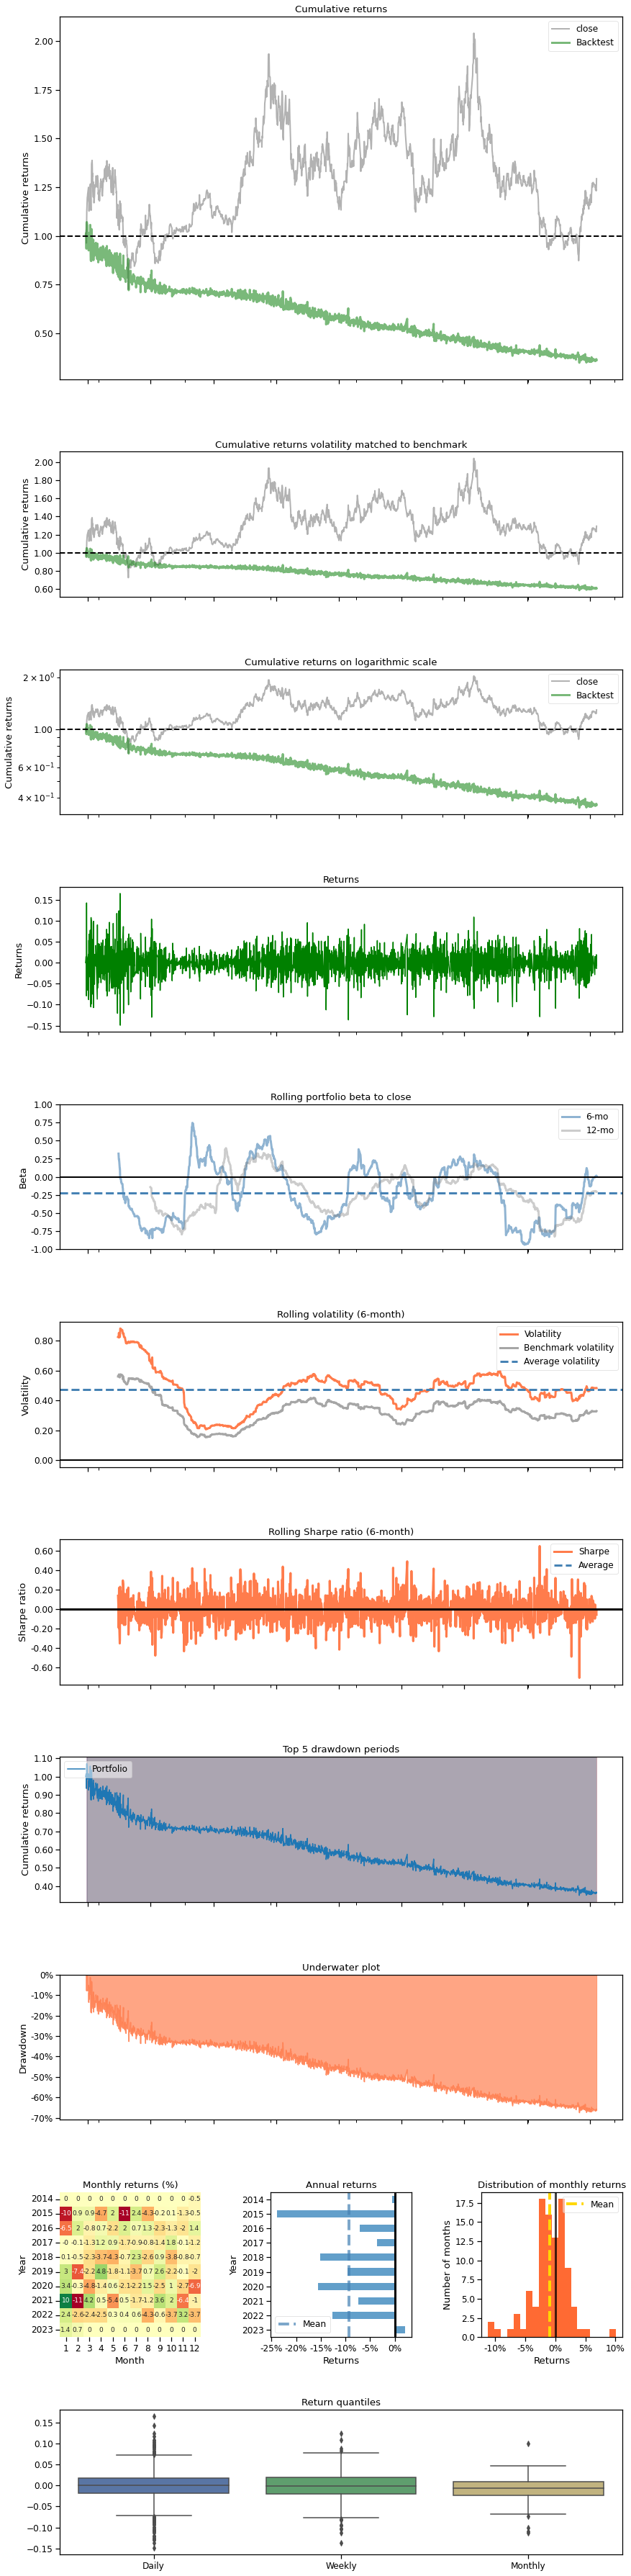

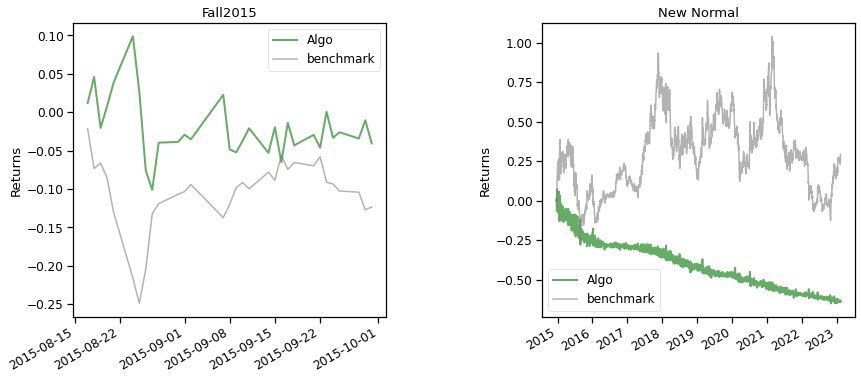

In [79]:
df.index = pd.to_datetime(df.date)
asset_wo_short = df.change_w_short.diff().fillna(0)# .tz_localize('UTC')
buy_n_hold = df.close.pct_change().fillna(0) #.tz_localize('UTC')
import pyfolio
with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(
            returns=asset_wo_short  , benchmark_rets=buy_n_hold, set_context=False
        )


In [14]:
x1=np.array([1,2,3]) 
x2=np.array([[5],[8],[9]]) 
np.dot(x1,x2)

array([48])